In [1]:
import numpy as np

def function(x):
    return np.power(x,3) * np.exp(-x)


def Simpson(function, a, b, n):

    h = (b-a)/n
    sodd = seven = 0.0
    for i in range(2,n-1,2):
        #print("Even", i)
        seven = seven + function(a + i*h) # odd-index sum
    for i in range(1,n,2):
        #print("Odd", i)
        sodd = sodd + function(a + i*h) # even-index sum

    return (h/3)*(function(a) + 4*sodd + 2*seven + function(b))


a = 0.0; b = 1.0; n = 30
I = Simpson(function,a,b,n)
I2 = 6.0 - 16.0/np.exp(1.0) 
print(" I (Simpson)                 = ", I)
print(" I (True)                    = ", I2)
print("|I (Simpson) - I (True)|     = ", np.abs(I - I2))
print('')
e


 I (Simpson)                 =  0.11392889006168853
 I (True)                    =  0.11392894125692266
|I (Simpson) - I (True)|     =  5.119523412144833e-08



In [2]:
import numpy as np

def function(x):
    return np.power(x,3) * np.exp(-x)


def Trapezoidal(function, a, b, n):

   h = (b-a)/n
   s = 0.0
   for i in range(1,n):
       #print(i)
       s = s + function(a+i*h)
   return (h/2)*(function(a) + 2.0*s + function(b))

# main
a = 0.0; b = 1.0; n = 30
I = Trapezoidal(function,a,b,n)
I2 = 6.0 - 16.0/np.exp(1.0) 
print(" I (Trapezoidal)             = ", I)
print(" I (True)                    = ", I2)
print("|I (Trapezoidal) - I (True)| = ", np.abs(I - I2))
print('')



 I (Trapezoidal)             =  0.1139970798881186
 I (True)                    =  0.11392894125692266
|I (Trapezoidal) - I (True)| =  6.81386311959381e-05



In [3]:
import numpy as np

def function(x):
    return np.power(x,3) * np.exp(-x)


def TrapizoidalAdaptive(function, a, b, eps = 1e-6):

    kmax = 30 # max. no. of step halving iterations
    h = b-a; n = 1
    t0 = 0.5*h*(function(a) + function(b)) # initial approximation

    for k in range(1,kmax+1):   # step halving loop
        sumf = 0.0
        for i in range(1,n+1):
            sumf = sumf + function(a+(i-0.5)*h)
 
        t = 0.5*(t0 + h*sumf)   # new approximation
        
        if (k > 1):             # convergence chece
            if (np.fabs(t-t0) <= eps*np.fabs(t)): break
            if (np.fabs(t) <= eps and np.fabs(t) <= np.fabs(t-t0)): break # integral ~= 0
        
        h = h*0.5; n = n*2; t0 = t

    if (k >= kmax): print("TrapizoidalAdaptive: max. no. of iterations exceeded !")
    print(" Iteration                              = ", k)
    return t


xmin = 0.0; xmax = 1.0; eps = 1e-6

I = TrapizoidalAdaptive(function,xmin,xmax,eps)
I2 = 6.0 - 16.0/np.exp(1.0)
print(" I (Trapizoidal Adapative)              = ", I)
print(" I (True)                               = ", I2)
print("|I (Trapizoidal Adapative) - I (True)|  = ", np.abs(I - I2))

xmin = 0.0; xmax = 1.0;
epss = np.linspace(1.0e-14,1.0e-10,10)
Ts=[]
for e in epss:
    Ts.append(TrapizoidalAdaptive(function,xmin,xmax,e))


 Iteration                              =  11
 I (Trapizoidal Adapative)              =  0.11392895587513915
 I (True)                               =  0.11392894125692266
|I (Trapizoidal Adapative) - I (True)|  =  1.4618216498396563e-08
 Iteration                              =  23
 Iteration                              =  19
 Iteration                              =  19
 Iteration                              =  18
 Iteration                              =  18
 Iteration                              =  18
 Iteration                              =  18
 Iteration                              =  18
 Iteration                              =  18
 Iteration                              =  17


In [4]:

import numpy as np

def function(x):
    return np.power(x,3) * np.exp(-x)

def SimpsonAdaptive(Function, a, b, eps = 1e-6):

    kmax = 30
    h = b-a; n = 1
    s0 = t0 = 0.5*h*(function(a) + function(b))
    
    for k in range(1,kmax+1):
        sumf = 0.0
        for i in range(1,n+1):
            sumf = sumf + function(a+(i-0.5)*h)
        t = 0.5*(t0 + h*sumf)
        s = (4.0*t - t0)/3.0
        if (k > 1):
            print(np.fabs(s-s0), np.fabs(s))
            if (np.fabs(s-s0) <= eps*np.fabs(s)): break
            if (np.fabs(s) <= eps and np.fabs(s) <= np.fabs(s-s0)): break # integral ~= 0            
            h = h*0.5
            n = n*2
            s0 = s
            t0 = t

    if (k >= kmax): print("SimpsonAdaptive: max. no. of iterations exceeded!")
    print(" Iteration                          = ", k)
    return s

# main
a = 0.0; b = 1.0; eps = 1e-8
I = SimpsonAdaptive(function,a,b,eps)
I2 = 6.0 - 16.0/np.exp(1.0)
print(" I (Simpson Adapative)              = ", I)
print(" I (True)                           = ", I2)
print("|I (Simpson Adapative) - I (True)|  = ", np.abs(I - I2))

0.07208225874776135 0.11185746183795982
0.0019180142280423307 0.11377547606600215
0.00014346897097933242 0.11391894503698148
9.365010991357892e-06 0.11392831004797284
5.916571985398189e-07 0.11392890170517138
3.707818396758711e-08 0.11392893878335535
2.3189447861948764e-09 0.11392894110230013
1.4495842026729377e-10 0.11392894124725855
 Iteration                          =  9
 I (Simpson Adapative)              =  0.11392894124725855
 I (True)                           =  0.11392894125692266
|I (Simpson Adapative) - I (True)|  =  9.664102851303369e-12


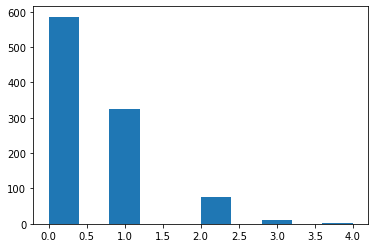

In [5]:
import numpy as np
import matplotlib.pyplot as plt
lm=0.5
N=1000   #sampling size of poisson 
Poisson=[]
for i in range(N):
  k=0
  p=np.random.uniform(0,1,1)
  while p>np.exp(-lm):         # refer cpnotes20march2022_last page for theory used here
    p=p*np.random.uniform(0,1,1)
    k+=1               
  Poisson.append(k)
plt.hist(Poisson)
plt.show()